# Using lapse probabilities and distributions in HSSM

Since v0.1.2, HSSM has added the ability to model outliers in the distribution with lapse probabilities and distributions. Let's see how it works.

In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt

import hssm

hssm.set_floatX("float32")

## Lapse probabilities and distributions are enabled by default.

From v0.1.2 on, lapse probabilities and distributions are enabled by default. If left unspecified, the probability for outliers will be a fixed value of 0.05 and the distribution will be specified as `Uniform(0, 10)`.

In [2]:
# Simulate some data

ddm_data = hssm.simulate_data(model="ddm", theta=[0.5, 1.5, 0.5, 0.1], size=1000)

ddm_data.head()

,rt,response
0,1.763022,1.0
1,1.768022,1.0
2,1.896028,1.0
3,2.093037,1.0
4,0.854994,1.0


In [12]:
import numpy as np
np.mean(ddm_data["response"] == 1.0)

0.84

In [13]:
# Build the simplest model specifying only data
# Note the model output

ddm_model_default = hssm.HSSM(
    data=ddm_data,
    # t=bmb.Prior("Uniform", lower=0.0, upper=3.0, initval=0.5),
    a=bmb.Prior("HalfNormal", sigma=0.1),
    p_outlier=None,
    lapse=None
)
ddm_model_default

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

a:
    Prior: HalfNormal(sigma: 0.10000000149011612)
    Explicit bounds: None
v:
    Prior: Uniform(lower: -10.0, upper: 10.0)
    Explicit bounds: None
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: Uniform(lower: 0.0, upper: 2.0, initval: 0.10000000149011612)
    Explicit bounds: None

In [15]:
ddm_model_default.sample(cores=8, chains=8, tune=0, draws=100)

Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
INFO:pymc.sampling.mcmc:Multiprocess sampling (8 chains in 8 jobs)
NUTS: [t, z, a, v]
INFO:pymc.sampling.mcmc:NUTS: [t, z, a, v]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 726 seconds.
INFO:pymc.sampling.mcmc:Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 726 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
INFO:pymc.stats.convergence:The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1997 divergenc

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [5]:
ddm_model_default.pymc_model.debug()

point={'z_interval__': array(0., dtype=float32), 'a_log__': array(0.6931472, dtype=float32), 't_interval__': array(-2.944439, dtype=float32), 'v_interval__': array(0., dtype=float32)}

No problems found


/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


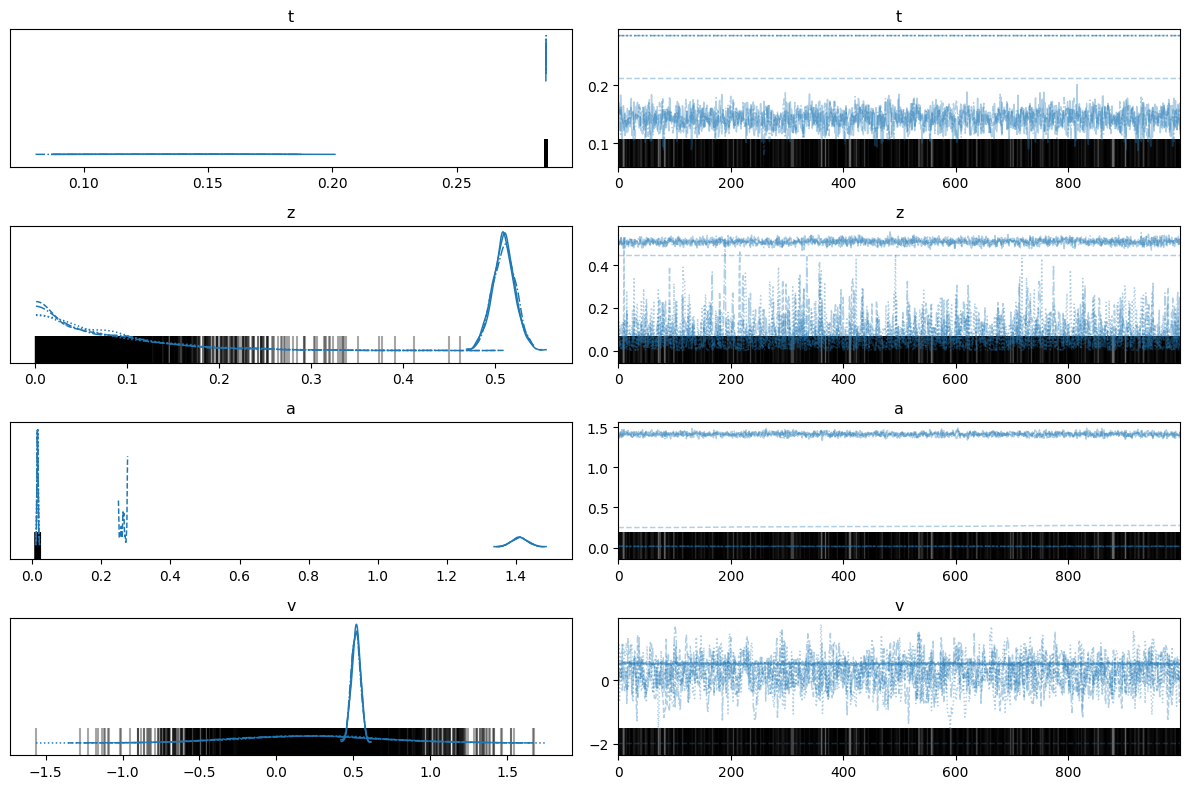

In [16]:
az.plot_trace(ddm_model_default.traces);
plt.tight_layout()

In [5]:
ddm_model_default.sample(cores=1, random_seed=1001, tune=500, draws=500)

Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc.sampling.mcmc:Sequential sampling (2 chains in 1 job)
NUTS: [z, a, t, v]
INFO:pymc.sampling.mcmc:NUTS: [z, a, t, v]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 11 seconds.
INFO:pymc.sampling.mcmc:Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
INFO:pymc.stats.convergence:We recommend running at least 4 chains for robust computation of convergence diagnostics


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

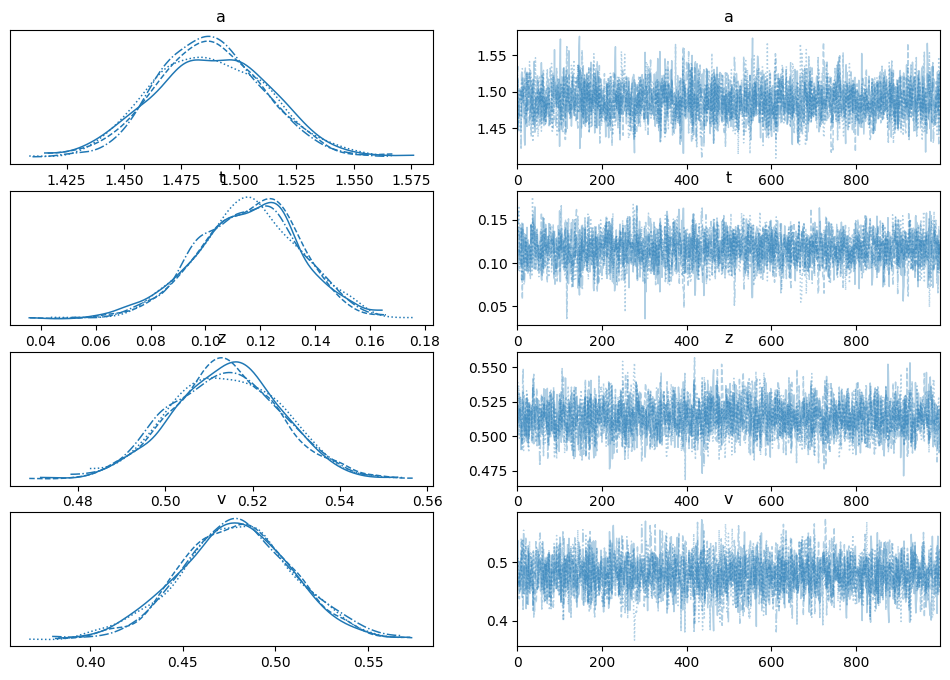

In [8]:
az.plot_trace(ddm_model_default.traces)

In [46]:
import pymc as pm
ddm_model_default.sample(step=pm.Slice(model=ddm_model_default.pymc_model))

Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc.sampling.mcmc:Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
INFO:pymc.sampling.mcmc:CompoundStep
>Slice: [t]
INFO:pymc.sampling.mcmc:>Slice: [t]
>Slice: [z]
INFO:pymc.sampling.mcmc:>Slice: [z]
>Slice: [a]
INFO:pymc.sampling.mcmc:>Slice: [a]
>Slice: [v]
INFO:pymc.sampling.mcmc:>Slice: [v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

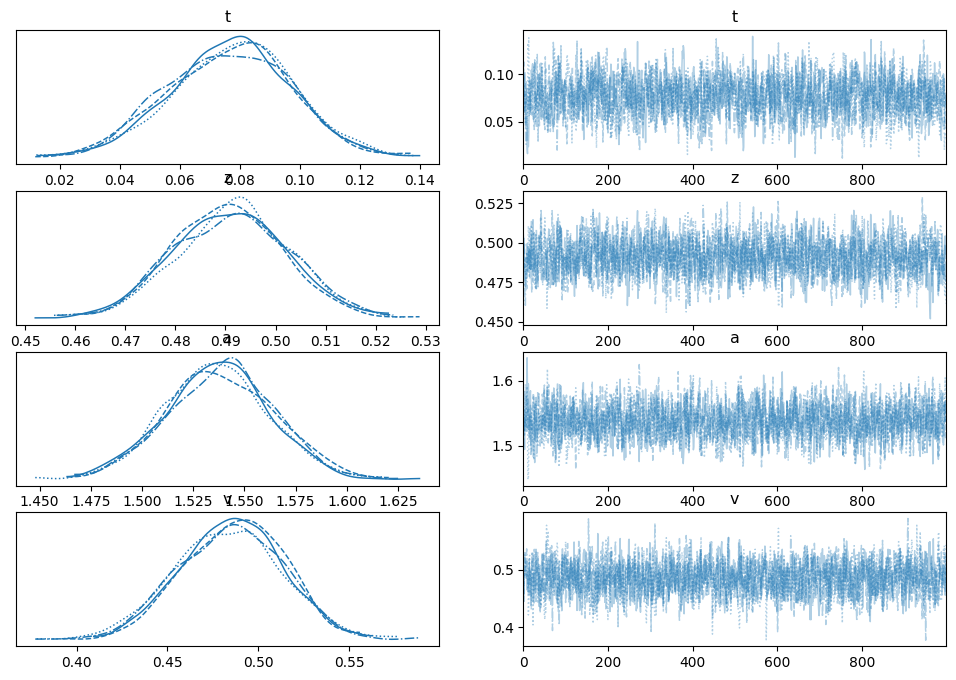

In [47]:
az.plot_trace(ddm_model_default.traces)

In [23]:
ddm_model_default.traces.sample_stats.mean(dim="draw")

<xarray.Dataset>
Dimensions:                (chain: 3)
Coordinates:
  * chain                  (chain) int64 0 1 2
Data variables: (12/17)
    step_size_bar          (chain) float64 0.4812 0.0005466 0.3826
    acceptance_rate        (chain) float64 0.8558 0.3876 0.7068
    reached_max_treedepth  (chain) float64 0.0 0.0 0.0
    n_steps                (chain) float64 7.426 4.966 7.478
    largest_eigval         (chain) float64 nan nan nan
    perf_counter_diff      (chain) float64 0.004102 0.002758 0.004137
    ...                     ...
    step_size              (chain) float64 0.4641 0.0002956 0.3262
    diverging              (chain) float64 0.0 0.023 0.0
    energy_error           (chain) float64 -0.0002602 0.4072 0.0007841
    smallest_eigval        (chain) float64 nan nan nan
    tree_depth             (chain) float64 2.964 2.002 2.985
    perf_counter_start     (chain) float64 713.1 709.3 712.7

In [51]:
ddm_lan_model = hssm.HSSM(data=ddm_data, loglik_kind="approx_differentiable",
                         t=bmb.Prior("Uniform", lower=0, upper=3.0, initval=0.6))
ddm_lan_model

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: approx_differentiable
Observations: 1000

Parameters:

t:
    Prior: Uniform(lower: 0.0, upper: 3.0, initval: 0.6000000238418579)
    Explicit bounds: (0.0, 2.0)
v:
    Prior: Uniform(lower: -3.0, upper: 3.0)
    Explicit bounds: (-3.0, 3.0)
a:
    Prior: Uniform(lower: 0.30000001192092896, upper: 2.5)
    Explicit bounds: (0.3, 2.5)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

In [53]:
ddm_lan_model.sample(cores=1)

Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc.sampling.mcmc:Sequential sampling (2 chains in 1 job)
NUTS: [t, z, a, v]
INFO:pymc.sampling.mcmc:NUTS: [t, z, a, v]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 63 seconds.
INFO:pymc.sampling.mcmc:Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 63 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
INFO:pymc.stats.convergence:We recommend running at least 4 chains for robust computation of convergence diagnostics


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

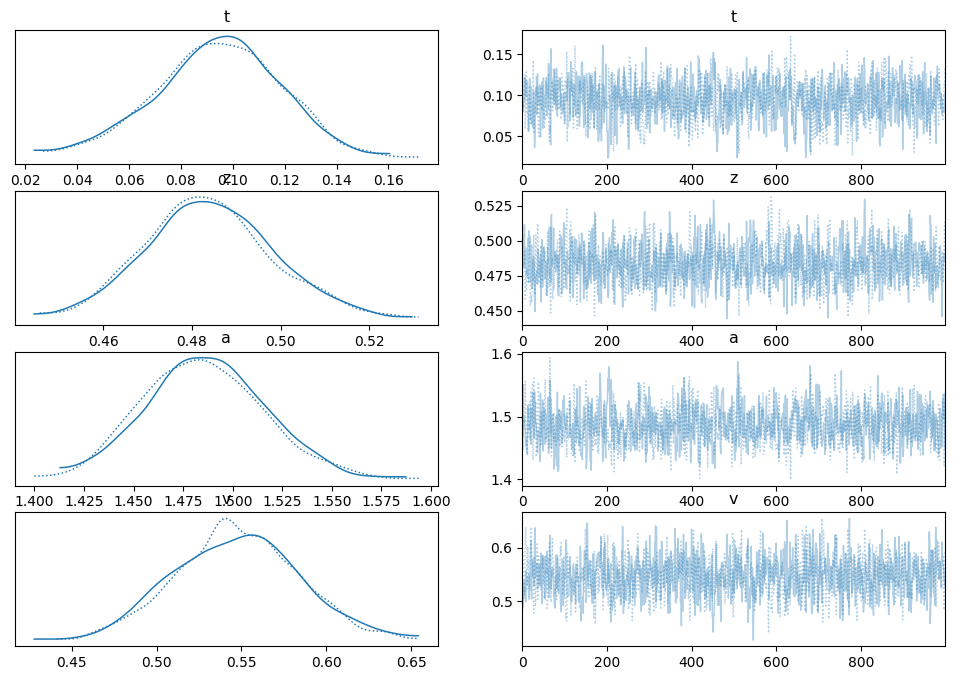

In [55]:
az.plot_trace(ddm_lan_model.traces)

In [30]:
from hssm.likelihoods import logp_ddm

In [36]:
import numpy as np
np.save("error.npz", logp_ddm(ddm_data, 0.5, 1.5, 0.5, 0.5).eval())

In [40]:
output = np.load("error.npz.npy")
output

array([ -0.92351458,  -2.18024219,  -1.28206442,  -0.9234592 ,
        -4.47686098,  -2.4501309 ,  -2.5568656 ,  -2.87853873,
        -2.2745918 ,  -1.14499845,  -2.23554486,  -1.11170417,
        -2.23217877,  -1.64153941,  -4.05401695,  -1.98176791,
        -4.18056193, -66.1       ,  -2.46444623,  -1.18536361,
        -4.39710368,  -3.14915212,  -2.54523679,  -1.1954396 ,
       -23.91769869,  -3.12677151,  -4.06597562,  -1.37787762,
       -35.98799656,  -1.06300782,  -3.29741778,  -2.14937492,
        -1.61618338,  -1.03219229,  -2.2671863 ,  -2.51485677,
        -2.37019142,  -0.95791469,  -2.42308571,  -3.42523757,
        -2.11504301,  -1.06977791,  -6.61537736,  -2.74582901,
        -0.93628643,  -0.95022127,  -1.11470573,  -2.16418506,
       -13.56650874,  -0.97469557,  -1.04618824,  -1.65965703,
        -1.00764889,  -2.42539766,  -0.97217539,  -1.40543134,
        -1.01334552,  -1.79876276,  -1.30551539,  -2.50416819,
        -2.03157459,  -1.39665311,  -1.46819504, -28.74

In [41]:
output1 = logp_ddm(ddm_data, 0.5, 1.5, 0.5, 0.5, err=).eval()

In [43]:
np.max(output1 - output)

0.0

<div class="admonition note">
  <p class="admonition-title">Note</p>
  <p>
    Note in the above output that lapse probability and lapse distributions are at default values.
  </p>
</div>

## Specifying lapse probability and distribution

It is easy to change the lapse probability and distribution. HSSM has added two arguments, `p_outlier` and `lapse` to allow the lapse probability and distribution to be specified.

The optional `p_outlier` accepts a `float`, a `dict`, or a `bmb.Prior` object. When `p_outlier` is specified as a single `float` value, it will be considered "fixed". You can also specify a prior distribution for `p_outlier` through a `dict` or a `bmb.Prior` object, the same way as you would when specifying priors for any other parameter. That way, the lapse probability will be considered another parameter and will be estimated during MCMC sampling.

Likewise, the `lapse` argument accepts a `dict` or a `bmb.Prior` object to specify a fixed lapse distribution. This distribution will be considered as the one that outliers are generated from.

In [4]:
ddm_model_lapse = hssm.HSSM(
    data=ddm_data,
    p_outlier={"name": "Uniform", "lower": 0.01, "upper": 0.5},
    lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
)

ddm_model_lapse

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Prior: Uniform(lower: -10.0, upper: 10.0)
    Explicit bounds: None
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: None
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: Uniform(lower: 0.0, upper: 2.0, initval: 0.10000000149011612)
    Explicit bounds: None

Lapse probability: Uniform(lower: 0.009999999776482582, upper: 0.5)
Lapse distribution: Uniform(lower: 0.0, upper: 20.0)

In [7]:
lapse_trace = ddm_model_lapse.sample()
lapse_trace

Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc.sampling.mcmc:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, t, p_outlier, z, v]
INFO:pymc.sampling.mcmc:NUTS: [a, t, p_outlier, z, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [8]:
az.summary(lapse_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.525,0.028,1.472,1.576,0.001,0.0,1969.0,1898.0,1.0
t,0.071,0.022,0.027,0.107,0.001,0.0,1800.0,1556.0,1.0
p_outlier,0.017,0.006,0.010,0.028,0.000,0.0,2569.0,1443.0,1.0
z,0.478,0.012,0.454,0.501,0.000,0.0,2074.0,2223.0,1.0
v,0.544,0.030,0.488,0.601,0.001,0.0,2080.0,2183.0,1.0


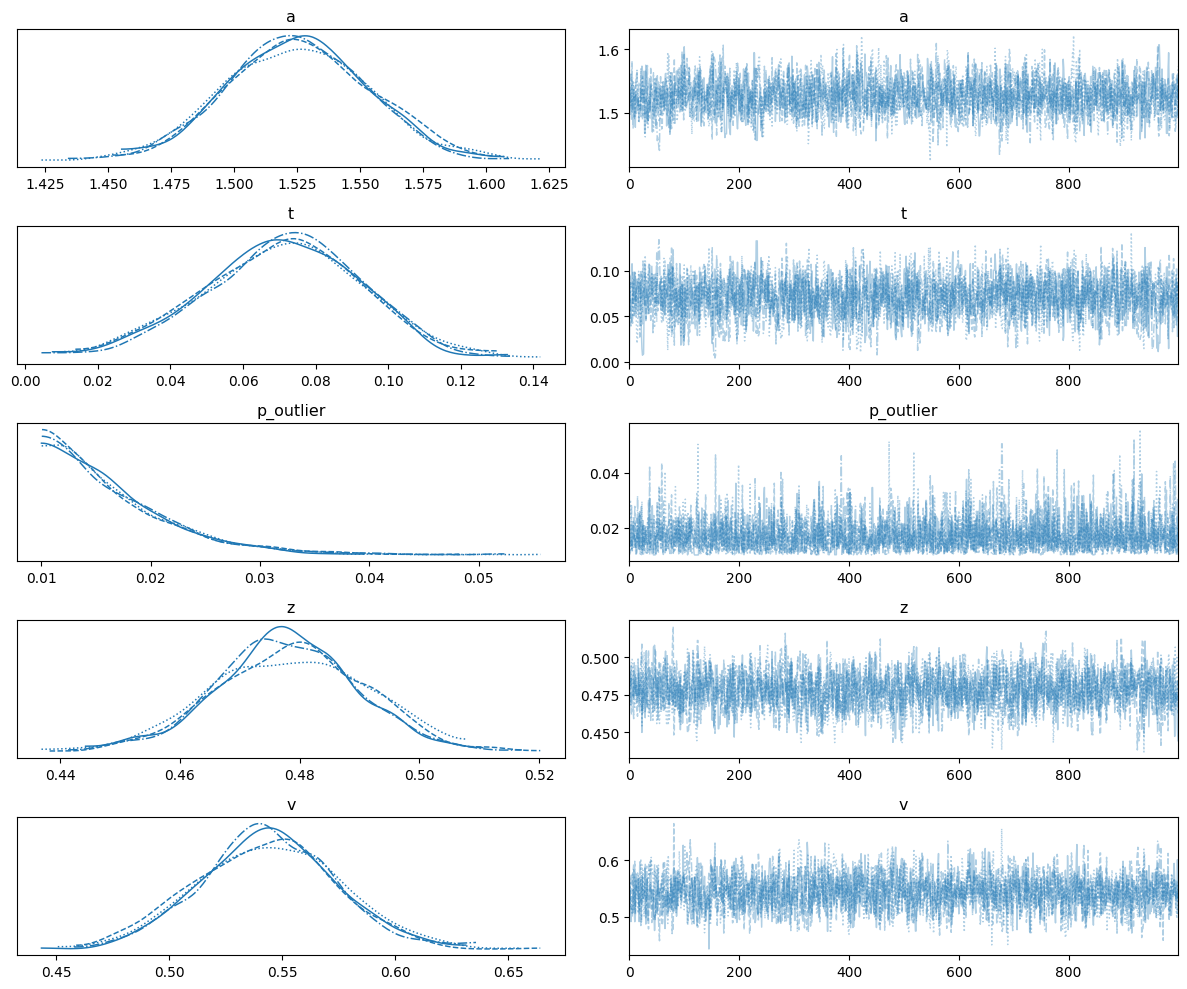

In [10]:
az.plot_trace(lapse_trace)
plt.tight_layout()

## Disable lapse probabilities and distributions

When both `p_outliers` and `lapse` are set to None, lapse probability and distributions will be ignored. They will not be included in the model output. This is different from setting `p_outlier=0`, where it is essentially still included in the likelihood computation.

<div class="admonition note">
  <p class="admonition-title">Note</p>
  <p>
    If only one of `p_outlier` and `lapse` is set to None, a `ValueError` will be raised. Please remember to set both of them to `None`.
  </p>
</div>

In [12]:
ddm_model_no_lapse = hssm.HSSM(data=ddm_data, p_outlier=None, lapse=None)
ddm_model_no_lapse

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Prior: Uniform(lower: -10.0, upper: 10.0)
    Explicit bounds: None
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: None
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: Uniform(lower: 0.0, upper: 2.0, initval: 0.10000000149011612)
    Explicit bounds: None